In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import a 311 NYC service request.

In [2]:
data=pd.read_csv('311_Service_Requests_from_2010_to_Present_project2.csv',parse_dates=['Created Date', 'Closed Date','Resolution Action Updated Date'],index_col='Unique Key')
data

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"


## Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [3]:
#Prepare data
def prepareData(data):
    data['Request_Closing_Time'] = (data['Closed Date'] - data['Created Date']).dt.total_seconds() ####days/3600
    df_clean=data[data['Request_Closing_Time'].notnull()]
    df = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    df['Day of Week'] = df['Created Date'].dt.dayofweek
    df['Day of Month'] = df['Created Date'].dt.day
    df['Month'] = df['Created Date'].dt.month
    df['Year'] = df['Created Date'].dt.year
    df=df[df.Borough!='Unspecified']
    return df

In [4]:
df = prepareData(data)
df.shape

(298068, 57)

In [5]:
df.isnull().sum()

Created Date                           0
Closed Date                            0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5907
Location Type                        122
Incident Zip                          41
Incident Address                   44390
Street Name                        44390
Cross Street 1                     47183
Cross Street 2                     47187
Intersection Street 1             254714
Intersection Street 2             254714
Address Type                         241
City                                  41
Landmark                          297719
Facility Type                          8
Status                                 0
Due Date                               1
Resolution Description                 0
Resolution Action Updated Date        39
Community Board                        0
Borough                                0
X Coordinate (St

## Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [6]:
df.replace('Unspecified',np.NaN,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298068 entries, 32310363 to 30281825
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    298068 non-null  datetime64[ns]
 1   Closed Date                     298068 non-null  datetime64[ns]
 2   Agency                          298068 non-null  object        
 3   Agency Name                     298068 non-null  object        
 4   Complaint Type                  298068 non-null  object        
 5   Descriptor                      292161 non-null  object        
 6   Location Type                   297946 non-null  object        
 7   Incident Zip                    298027 non-null  float64       
 8   Incident Address                253678 non-null  object        
 9   Street Name                     253678 non-null  object        
 10  Cross Street 1                  250885 non-null

In [8]:
df.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
  

In [9]:
remove_col=['Agency Name','Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type','Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found','School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name','X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Landmark', 'Facility Type', 'Location','Due Date' ]

In [10]:
df.drop(remove_col, inplace=True, axis=1)

In [11]:
df=df[df['Status']=='Closed']

In [12]:
df.drop('Status',inplace=True,axis=1)

In [13]:
df=df[(df['Latitude'].notnull())&(df['Longitude'].notnull())&(df['Descriptor'].notnull())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 32310363 to 30281825
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    291204 non-null  datetime64[ns]
 1   Closed Date                     291204 non-null  datetime64[ns]
 2   Agency                          291204 non-null  object        
 3   Complaint Type                  291204 non-null  object        
 4   Descriptor                      291204 non-null  object        
 5   Location Type                   291149 non-null  object        
 6   Incident Zip                    291164 non-null  float64       
 7   City                            291164 non-null  object        
 8   Resolution Description          291204 non-null  object        
 9   Resolution Action Updated Date  291202 non-null  datetime64[ns]
 10  Community Board                 291204 non-null

In [14]:
df['City']=df['City'].str.upper()
df['City'].info()

<class 'pandas.core.series.Series'>
Int64Index: 291204 entries, 32310363 to 30281825
Series name: City
Non-Null Count   Dtype 
--------------   ----- 
291164 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


In [15]:
df.isnull().sum()

Created Date                       0
Closed Date                        0
Agency                             0
Complaint Type                     0
Descriptor                         0
Location Type                     55
Incident Zip                      40
City                              40
Resolution Description             0
Resolution Action Updated Date     2
Community Board                    0
Borough                            0
Latitude                           0
Longitude                          0
Request_Closing_Time               0
Day of Week                        0
Day of Month                       0
Month                              0
Year                               0
dtype: int64

In [16]:
df.nunique()

Created Date                      252057
Closed Date                       232076
Agency                                 1
Complaint Type                        15
Descriptor                            41
Location Type                         14
Incident Zip                         200
City                                  48
Resolution Description                12
Resolution Action Updated Date    232840
Community Board                       74
Borough                                5
Latitude                          123042
Longitude                         123141
Request_Closing_Time               47137
Day of Week                            7
Day of Month                          31
Month                                 10
Year                                   1
dtype: int64

In [17]:
df.dropna(subset=['City'], inplace=True)

In [18]:
df.isnull().sum()

Created Date                       0
Closed Date                        0
Agency                             0
Complaint Type                     0
Descriptor                         0
Location Type                     55
Incident Zip                       2
City                               0
Resolution Description             0
Resolution Action Updated Date     2
Community Board                    0
Borough                            0
Latitude                           0
Longitude                          0
Request_Closing_Time               0
Day of Week                        0
Day of Month                       0
Month                              0
Year                               0
dtype: int64

# Data Analysis and Visualization

In [19]:
df['Agency'].value_counts()

NYPD    291164
Name: Agency, dtype: int64

In [20]:
print('Start from : ',min(df['Created Date']))
print('Till : ',max(df['Created Date']))

Start from :  2015-03-29 00:33:01
Till :  2015-12-31 23:59:45


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291164 entries, 32310363 to 30281825
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    291164 non-null  datetime64[ns]
 1   Closed Date                     291164 non-null  datetime64[ns]
 2   Agency                          291164 non-null  object        
 3   Complaint Type                  291164 non-null  object        
 4   Descriptor                      291164 non-null  object        
 5   Location Type                   291109 non-null  object        
 6   Incident Zip                    291162 non-null  float64       
 7   City                            291164 non-null  object        
 8   Resolution Description          291164 non-null  object        
 9   Resolution Action Updated Date  291162 non-null  datetime64[ns]
 10  Community Board                 291164 non-null

In [22]:
df.nunique()

Created Date                      252025
Closed Date                       232045
Agency                                 1
Complaint Type                        15
Descriptor                            41
Location Type                         14
Incident Zip                         200
City                                  48
Resolution Description                12
Resolution Action Updated Date    232811
Community Board                       71
Borough                                5
Latitude                          123031
Longitude                         123130
Request_Closing_Time               47136
Day of Week                            7
Day of Month                          31
Month                                 10
Year                                   1
dtype: int64

In [23]:
for col in df.columns:
    if df[col].nunique() <300:
        df[col]=df[col].astype('category')
        
df.dropna(subset=['Created Date','Closed Date','City'], inplace=True)
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291164 entries, 32310363 to 30281825
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Created Date                    291164 non-null  datetime64[ns] 
 1   Closed Date                     291164 non-null  datetime64[ns] 
 2   Agency                          291164 non-null  category       
 3   Complaint Type                  291164 non-null  category       
 4   Descriptor                      291164 non-null  category       
 5   Location Type                   291109 non-null  category       
 6   Incident Zip                    291162 non-null  category       
 7   City                            291164 non-null  category       
 8   Resolution Description          291164 non-null  category       
 9   Resolution Action Updated Date  291162 non-null  datetime64[ns] 
 10  Community Board                 291

Text(0.5, 1.0, 'Frequency of Complaint types')

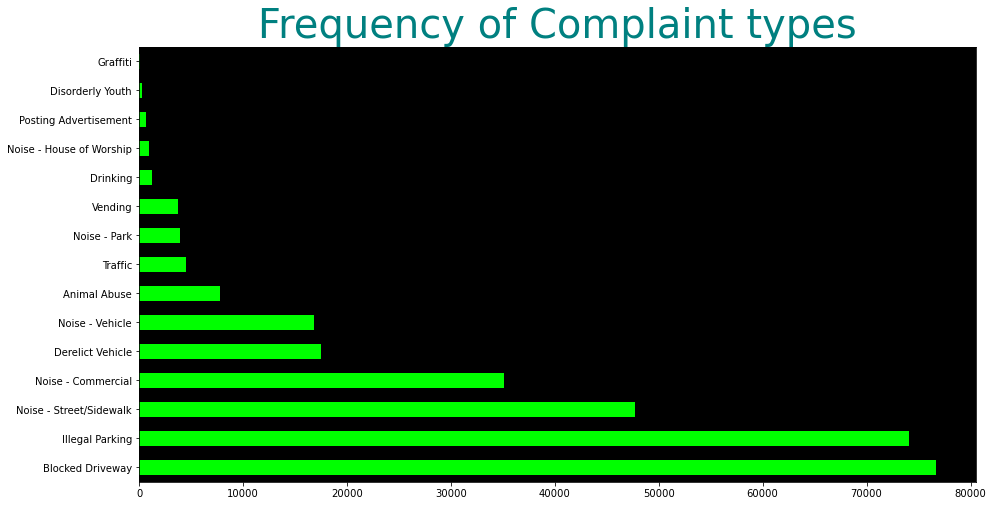

In [25]:
plt.figure(figsize=(15,8))
df['Complaint Type'].value_counts().plot(kind='barh', color='lime').set_facecolor('black')
plt.title("Frequency of Complaint types",size=40,color='teal')

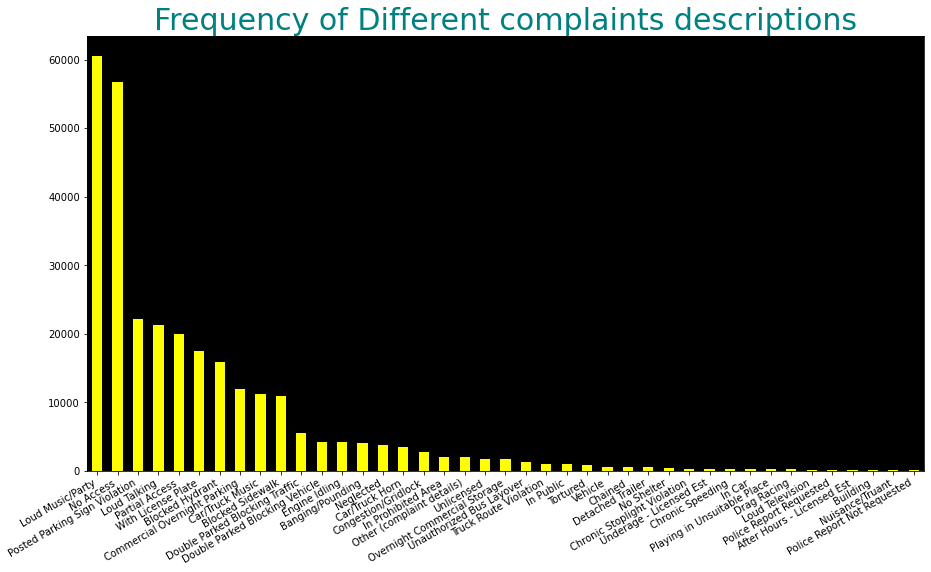

In [26]:
plt.figure(figsize=(15,8))
ax=df['Descriptor'].value_counts().plot(kind='bar',color='yellow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
ax.set_facecolor('black')
plt.title('Frequency of Different complaints descriptions',size=30,color='teal')
plt.show()

In [27]:
top_10_comp=df['Complaint Type'].value_counts().head(10)
top_10_comp

Blocked Driveway           76696
Illegal Parking            74039
Noise - Street/Sidewalk    47748
Noise - Commercial         35148
Derelict Vehicle           17511
Noise - Vehicle            16870
Animal Abuse                7745
Traffic                     4469
Noise - Park                3927
Vending                     3773
Name: Complaint Type, dtype: int64

In [28]:
top_10_comp=top_10_comp.index.tolist()

In [29]:
c_city=df.groupby(['City','Complaint Type']).size().unstack()
c_city=c_city[top_10_comp]
len(c_city.index)

48

In [30]:
c_borough=df.groupby(['Borough','Complaint Type']).size().unstack()
c_borough=c_borough[top_10_comp].head(10)
c_borough

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle,Animal Abuse,Traffic,Noise - Park,Vending
Borough,,,,,,,,,,
BRONX,12741,7831,8864,2431,1949,3385,1413,356,522,377
BROOKLYN,28128,27394,13316,11452,5167,5146,2390,1082,1537,514
MANHATTAN,2056,11981,20362,14530,530,5375,1511,1532,1167,2380
QUEENS,31630,21950,4391,6058,8102,2608,1874,1303,634,477
STATEN ISLAND,2141,4883,815,677,1763,356,557,196,67,25


## BOROUGH-WISE MAIN COMPLAINT TYPES

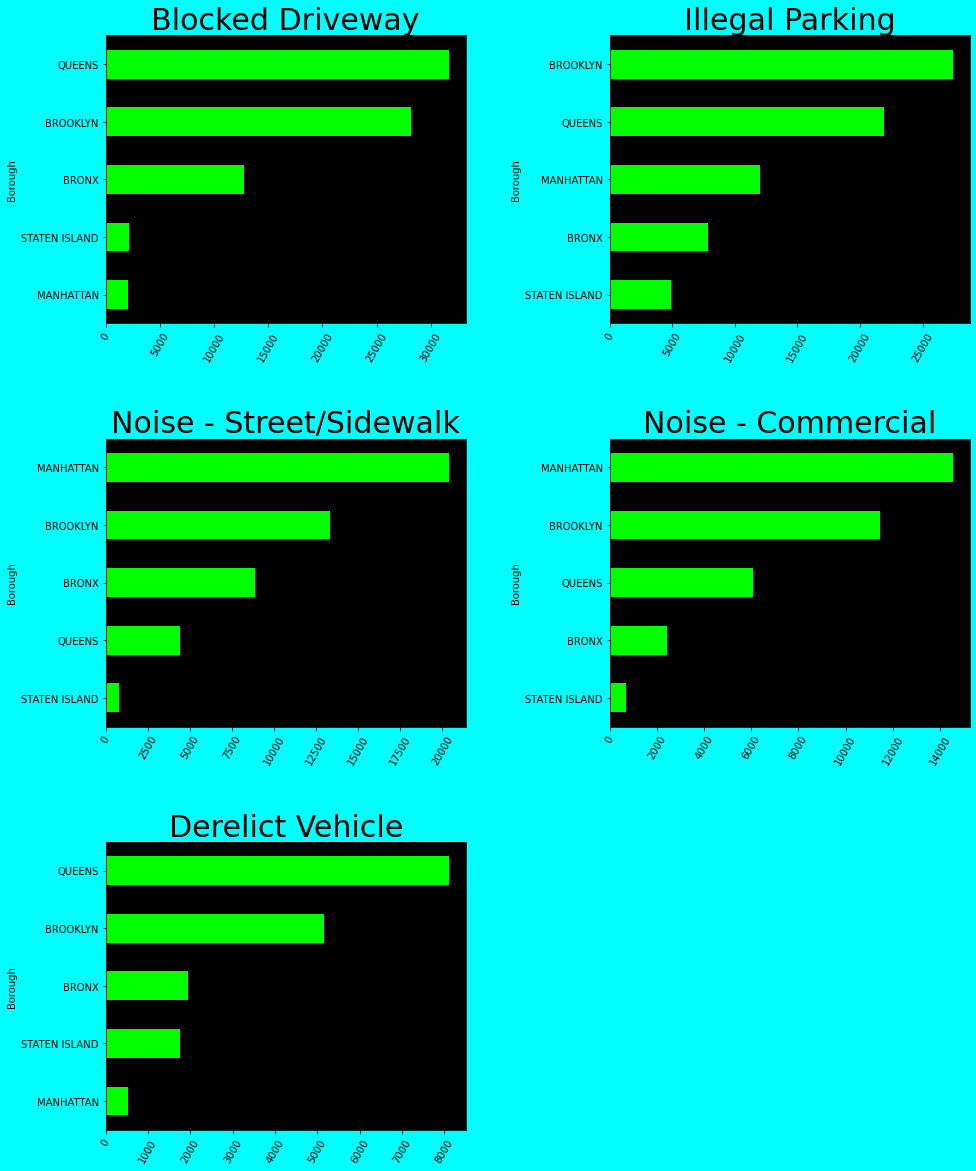

In [31]:
plt.figure(figsize=(15,8)).set_facecolor('aqua')
f=0
for i,j in c_borough.iteritems():
    if f!=5:
        ax=plt.subplot(3,2,f+1)
        ax.set_title(i,color='black',size=30)
        ax.set_facecolor('black')
        j=j.sort_values()
        j.plot(kind='barh',color='lime')
        plt.xticks(rotation=60)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
        f=f+1

## CITY-WISE MAIN COMPLAINTS

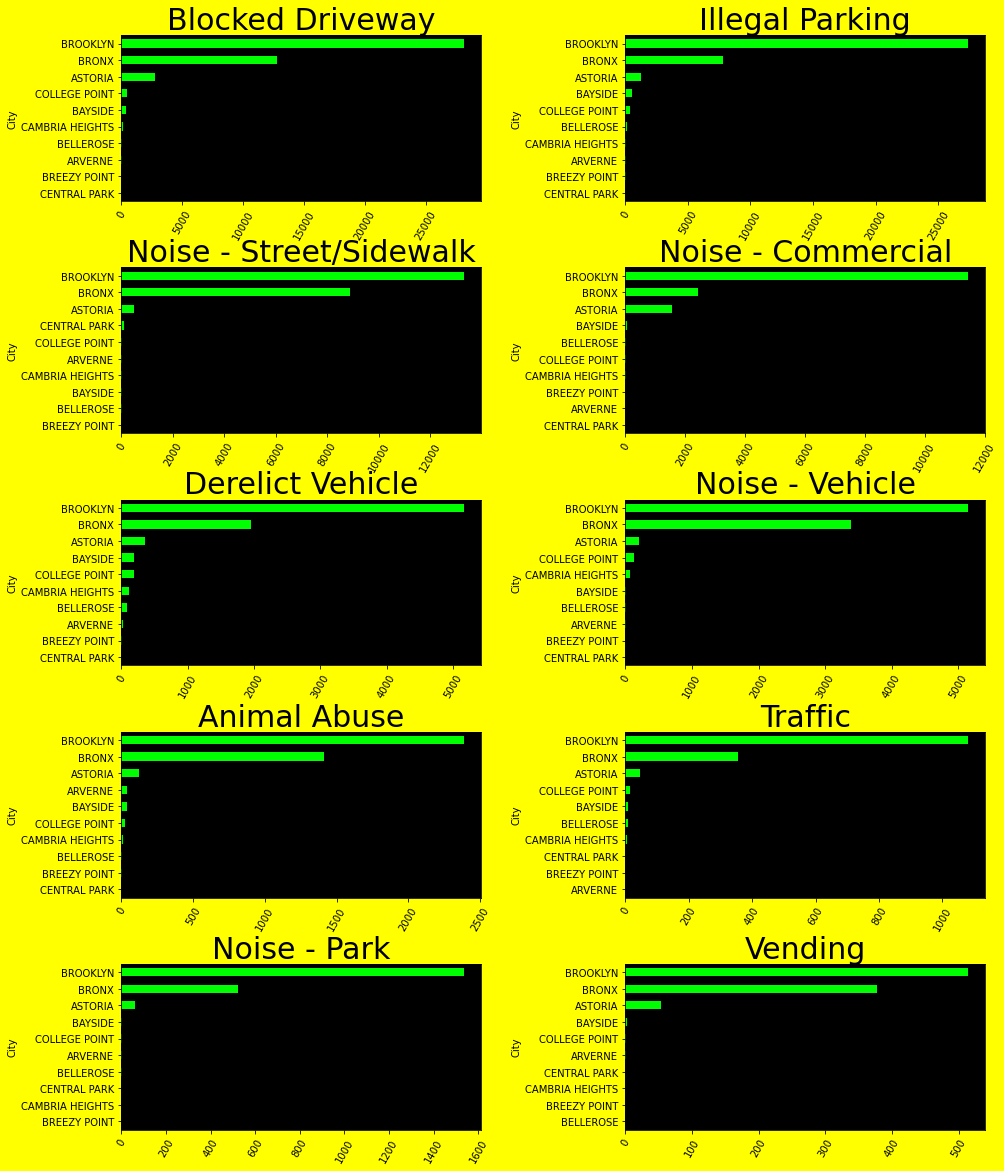

In [32]:

plt.figure(figsize=(15,8)).set_facecolor('yellow')
c_city=c_city.head(10)
f=0
for i,j in (c_city.iteritems()):
    if f!=10:
        plt.subplot(5,2,f+1)
        j=j.sort_values()
        ax=j.plot(kind='barh',color='lime')
        ax.set_facecolor('black')
        ax.set_title(i,size=30)
        plt.xticks(rotation=60)
        plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=2,wspace=0.4,hspace=0.4)
        f=f+1
    
  

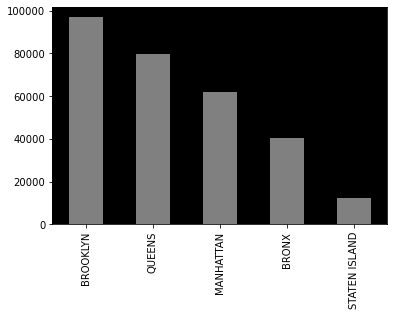

In [33]:
df['Borough'].value_counts().plot(kind='bar',color='gray').set_facecolor('black')

## Brooklyn has highest number of complaints

In [34]:
top_comp=df['Complaint Type'].value_counts().index.tolist()
top_comp

['Blocked Driveway',
 'Illegal Parking',
 'Noise - Street/Sidewalk',
 'Noise - Commercial',
 'Derelict Vehicle',
 'Noise - Vehicle',
 'Animal Abuse',
 'Traffic',
 'Noise - Park',
 'Vending',
 'Drinking',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Disorderly Youth',
 'Graffiti']

In [35]:
top_city_comp=df.groupby(['City','Complaint Type']).size().unstack()
top_city_comp=top_city_comp[top_comp]
top_city_comp

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle,Animal Abuse,Traffic,Noise - Park,Vending,Drinking,Noise - House of Worship,Posting Advertisement,Disorderly Youth,Graffiti
City,,,,,,,,,,,,,,,
ARVERNE,35,58,29,2,27,7,38,0,2,1,1,11,0,2,1
ASTORIA,2734,1278,499,1543,363,204,125,47,61,54,35,19,1,3,4
BAYSIDE,376,512,15,40,198,16,37,9,3,2,1,2,0,1,3
BELLEROSE,95,106,13,37,89,10,7,7,1,0,1,1,1,2,0
BREEZY POINT,3,15,1,4,3,1,2,0,0,0,1,0,0,0,0
BRONX,12741,7831,8865,2431,1949,3385,1413,354,522,377,188,79,16,63,9
BROOKLYN,28128,27394,13317,11452,5167,5146,2390,1081,1537,514,257,338,45,72,43
CAMBRIA HEIGHTS,147,76,25,12,115,77,11,6,0,0,0,2,0,0,0
CENTRAL PARK,0,2,95,0,0,0,0,0,0,0,0,0,0,0,0


## All cities with highest number of complaints.

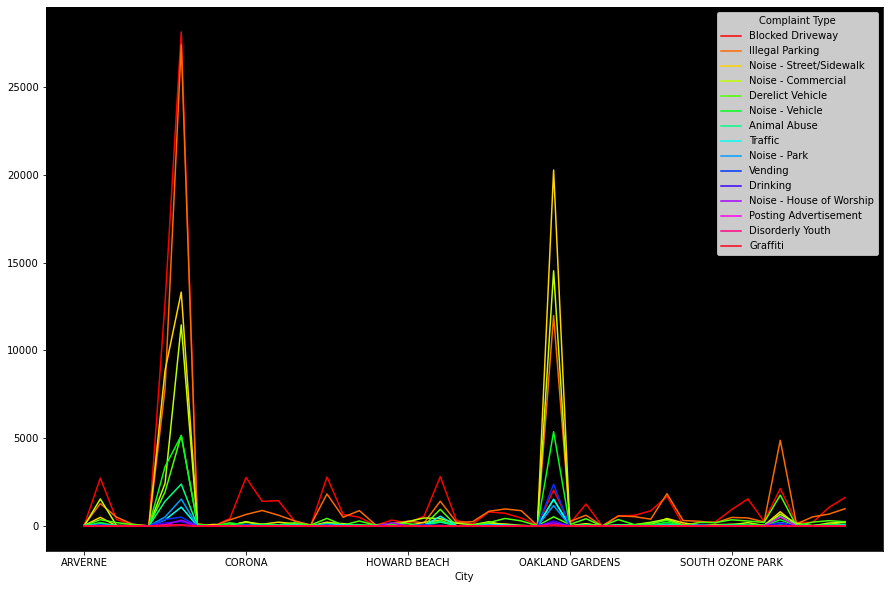

In [36]:
ax=top_city_comp.plot(figsize=(15,10),cmap='hsv')
ax.set_facecolor('black')


In [37]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


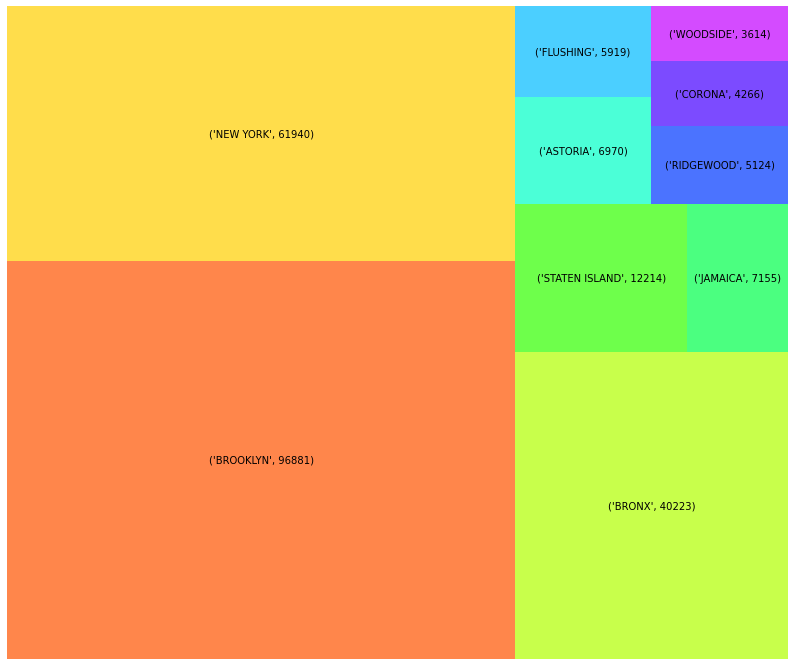

In [38]:
citywise_complaints = pd.DataFrame(df['City'].value_counts()[:10])

import squarify
fig = plt.gcf()
fig.set_size_inches(14, 12)
label=zip(list(-citywise_complaints.index),citywise_complaints['City'])
squarify.plot(sizes=citywise_complaints['City'], label=label, alpha=0.7,color=sns.color_palette("gist_rainbow", 
                                     len(citywise_complaints['City'])))
plt.axis('off')
plt.show()

## Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [39]:
df['Request_Closing_Time'].describe()

count                       291164
mean     0 days 04:18:31.308657663
std      0 days 06:03:43.742847273
min                0 days 00:01:00
25%                0 days 01:16:30
50%                0 days 02:42:38
75%                0 days 05:20:23
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [40]:
df['Request_Closing_Hours'] = pd.to_timedelta(df['Request_Closing_Time'].astype(str)) + pd.to_timedelta('01:00:00')
df['Request_Closing_Hours']=df['Request_Closing_Hours'].astype('timedelta64[h]')
df[['Request_Closing_Time','Request_Closing_Hours']].head()

,Request_Closing_Time,Request_Closing_Hours
Unique Key,,
32310363,0 days 00:55:15,1.0
32309934,0 days 01:26:16,2.0
32309159,0 days 04:51:31,5.0
32305098,0 days 07:45:14,8.0
32306529,0 days 03:27:02,4.0


In [41]:
mean = df['Request_Closing_Hours'].mean()
std = df['Request_Closing_Hours'].std()

print('Mean: ',mean)
print('Std: ',std)

Mean:  4.818466568669203
Std:  6.063935739044802


In [42]:
df['Request_Closing_Hours'].sort_values().tail()

Unique Key
32226107    224.0
32225355    224.0
32167187    520.0
32154771    578.0
30684975    593.0
Name: Request_Closing_Hours, dtype: float64

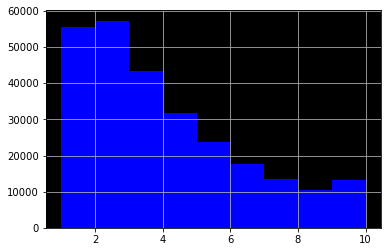

In [87]:
plot_data=df[((df['Request_Closing_Hours']-mean)/std)<1]
plot_data['Request_Closing_Hours'].hist(bins=9, color='blue').set_facecolor('black')

In [44]:
citywise_resolution = df.groupby(['Complaint Type','Borough'])[['Request_Closing_Hours']].mean().unstack()
citywise_resolution

Request_Closing_Hours                                \
Borough                                  BRONX  BROOKLYN MANHATTAN    QUEENS   
Complaint Type                                                                 
Animal Abuse                          7.837226  5.339331  4.199206  5.919957   
Blocked Driveway                      6.761950  4.914569  4.056420  5.037781   
Derelict Vehicle                      9.708568  6.467970  4.777358  9.007899   
Disorderly Youth                      4.746032  4.638889  2.911765  3.796610   
Drinking                              6.329787  4.038911  3.585034  4.394958   
Graffiti                              9.333333  8.767442  5.545455  7.054054   
Illegal Parking                       7.069595  4.777068  3.891495  5.261959   
Noise - Commercial                    5.215961  3.497031  3.255265  4.285408   
Noise - House of Worship              5.025316  3.594675  2.846561  4.110368   
Noise - Park                          5.247126  3.659076  3.466153  4.362776   
Noise - Street/Sidewalk               5.740636  3.813457  3.255034  4.143248   
Noise - Vehicle                       6.076809  3.793626  3.151256  4.219325   
Posting Advertisement                 4.062500  3.911111  3.463415  5.700000   
Traffic                               5.421348  3.624769  3.176893  4.775134   
Vending                               7.328912  5.029183  3.808824  5.283019   

                                        
Borough                  STATEN ISLAND  
Complaint Type                          
Animal Abuse                  5.464991  
Blocked Driveway              4.581037  
Derelict Vehicle              5.539989  
Disorderly Youth              4.434783  
Drinking                      3.971429  
Graffiti                     10.500000  
Illegal Parking               4.357772  
Noise - Commercial            3.511078  
Noise - House of Worship      3.058824  
Noise - Park                  3.447761  
Noise - Street/Sidewalk       3.495706  
Noise - Vehicle               3.716292  
Posting Advertisement         2.071845  
Traffic                       4.010204  
Vending                       4.720000

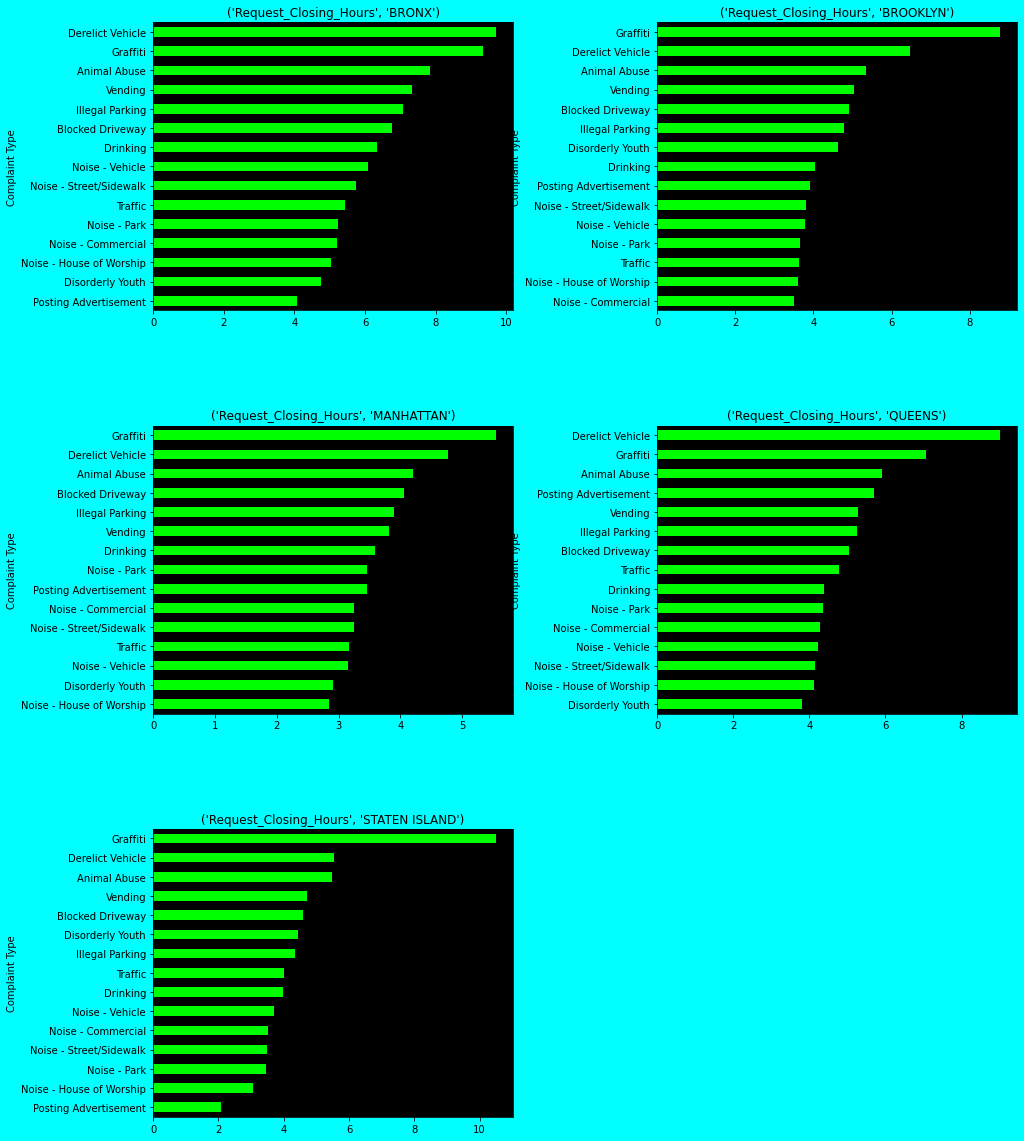

In [45]:
plt.figure(figsize=(15,8)).set_facecolor('aqua')
for i, (j,g) in enumerate(citywise_resolution.iteritems()):
    if i!=5:
        plt.subplot(3,2,i+1)
        g=g.sort_values(ascending = True)
        ax=g.plot(kind='barh', color='lime')
        ax.set_title(j)
        plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=2,wspace=0.4,hspace=0.4)
        ax.set_facecolor('black')
        
    

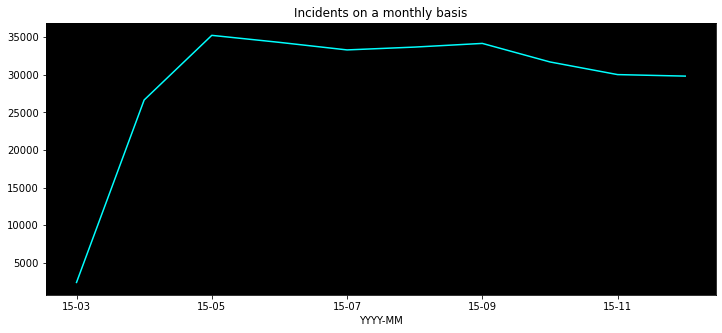

In [46]:
import datetime as dt
df['YYYY-MM']=df['Created Date'].apply(lambda x: dt.datetime.strftime(x,'%y-%m'))
m=df.groupby('YYYY-MM').size()
m.plot(figsize=(12,5), title='Incidents on a monthly basis', color='aqua').set_facecolor('black')

In [47]:
df.groupby(['YYYY-MM','Borough']).size().unstack()

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
YYYY-MM,,,,,
15-03,295,823,478,712,103
15-04,3180,8667,6349,7400,1042
15-05,5063,11495,8345,9067,1250
15-06,4781,11716,7046,9374,1373
15-07,5464,10449,6991,9063,1319
15-08,5370,10621,7171,8990,1511
15-09,4738,11843,7058,9072,1439
15-10,3928,10505,6792,9073,1391
15-11,3659,10422,6014,8495,1419


Text(0.5, 1.0, 'Complaints per Borough throughout the year')

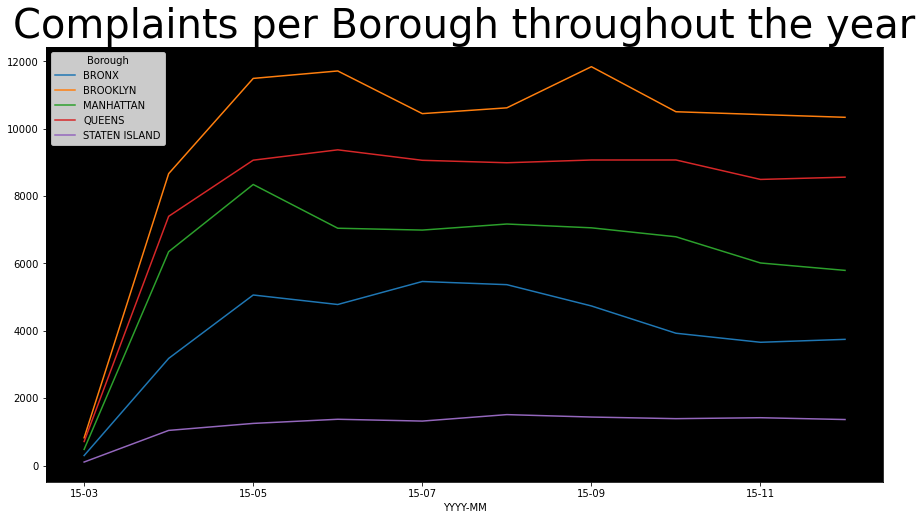

In [48]:

df.groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(15,8)).set_facecolor('black')
plt.title('Complaints per Borough throughout the year',size=40)

Text(0.5, 1.0, 'Processing time per Borough on a monthly basis')

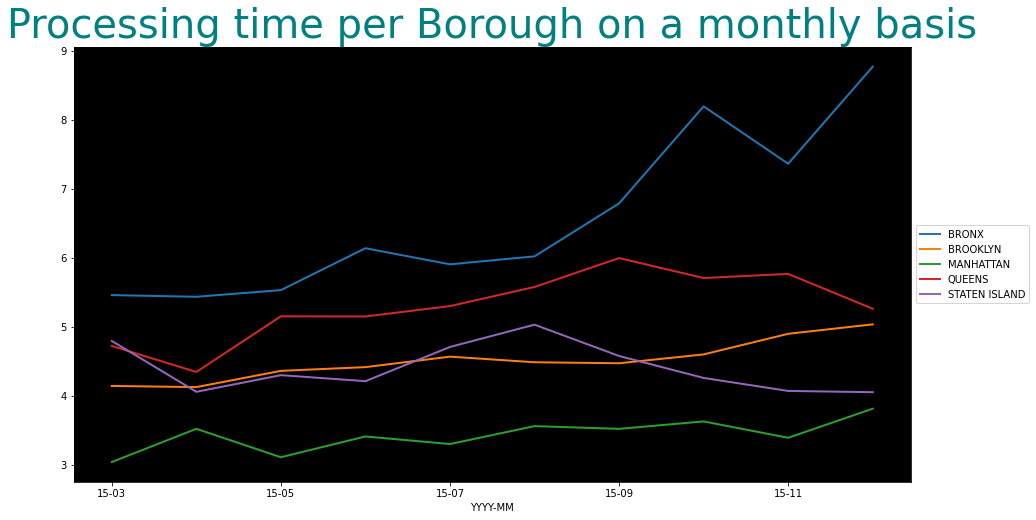

In [49]:
df.groupby(['YYYY-MM','Borough'])['Request_Closing_Hours'].mean().unstack().plot(figsize=(15,8), linewidth=2).set_facecolor('black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
plt.title('Processing time per Borough on a monthly basis',size=40,color='teal')

In [62]:
df

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Resolution Action Updated Date,...,Borough,Latitude,Longitude,Request_Closing_Time,Day of Week,Day of Month,Month,Year,Request_Closing_Hours,YYYY-MM
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,2016-01-01 00:55:00,...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15,3,31,12,2015,1.0,15-12
32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,2016-01-01 01:26:00,...,QUEENS,40.775945,-73.915094,0 days 01:26:16,3,31,12,2015,2.0,15-12
32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,2016-01-01 04:51:00,...,BRONX,40.870325,-73.888525,0 days 04:51:31,3,31,12,2015,5.0,15-12
32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,2016-01-01 07:43:00,...,BRONX,40.835994,-73.828379,0 days 07:45:14,3,31,12,2015,8.0,15-12
32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,2016-01-01 03:24:00,...,QUEENS,40.733060,-73.874170,0 days 03:27:02,3,31,12,2015,4.0,15-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,NEW YORK,The Police Department responded to the complai...,2015-03-29 01:13:01,...,MANHATTAN,40.716053,-73.991378,0 days 00:38:29,6,29,3,2015,1.0,15-03
30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,The Police Department responded and upon arriv...,2015-03-29 02:33:59,...,QUEENS,40.694077,-73.846087,0 days 02:00:31,6,29,3,2015,3.0,15-03
30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,The Police Department responded to the complai...,2015-03-29 03:40:20,...,BROOKLYN,40.699590,-73.944234,0 days 03:07:17,6,29,3,2015,4.0,15-03


In [63]:
df=df.reset_index()

In [65]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Day of Week', 'Day of Month', 'Month', 'Year',
       'Request_Closing_Hours', 'YYYY-MM'],
      dtype='object')

In [66]:
df.groupby('Borough')['Unique Key'].size()

Borough
BRONX            40224
BROOKLYN         96881
MANHATTAN        62038
QUEENS           79809
STATEN ISLAND    12212
Name: Unique Key, dtype: int64

In [67]:
df.groupby('Borough')['Request_Closing_Hours'].mean()

Borough
BRONX            6.590941
BROOKLYN         4.550965
MANHATTAN        3.455753
QUEENS           5.375847
STATEN ISLAND    4.382493
Name: Request_Closing_Hours, dtype: float64

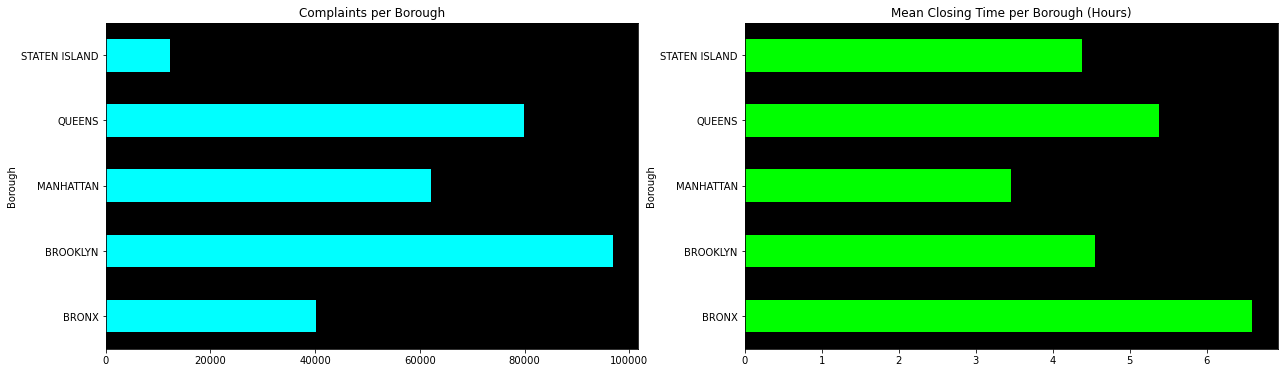

In [71]:
fig = plt.figure(figsize=(21,6))
plt.subplot(1, 2, 1).set_facecolor('black')
df.groupby('Borough')['Unique Key'].size().plot(kind='barh',title='Complaints per Borough',color='aqua');

plt.subplot(1, 2, 2).set_facecolor('black')
df.groupby('Borough')['Request_Closing_Hours'].mean().plot(kind='barh',title='Mean Closing Time per Borough (Hours)',color='lime');
plt.show()

In [72]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Day of Week', 'Day of Month', 'Month', 'Year',
       'Request_Closing_Hours', 'YYYY-MM'],
      dtype='object')

In [78]:
df['Request_Closing_sec']=df['Request_Closing_Hours']*3600

## Whether the average response time across complaint types is similar or not (overall)

In [79]:
df_avg=df.groupby('Complaint Type').Request_Closing_sec.mean()
df_avg

Complaint Type
Animal Abuse                20599.715946
Blocked Driveway            18863.857307
Derelict Vehicle            28293.232825
Disorderly Youth            14614.736842
Drinking                    15708.575924
Graffiti                    27557.522124
Illegal Parking             17972.430746
Noise - Commercial          13147.661318
Noise - House of Worship    13396.529284
Noise - Park                14122.230710
Noise - Street/Sidewalk     14248.755969
Noise - Vehicle             14800.545347
Posting Advertisement        9019.474498
Traffic                     14279.973148
Vending                     16269.175722
Name: Request_Closing_sec, dtype: float64

### Whether the average response time across complaint types is similar or not (overall)
-NO, ITS NOT.ACCORDING TO THE TABLE ABOVE.

In [80]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Day of Week', 'Day of Month', 'Month', 'Year',
       'Request_Closing_Hours', 'YYYY-MM', 'Request_Closing_sec'],
      dtype='object')

#  Are the type of complaint or service requested and location related?

In [81]:
df_analysis=df[['Complaint Type','City','Borough', 'Latitude', 'Longitude']]

In [82]:
df_analysis['Complaint Type']=df['Complaint Type'].cat.codes
df_analysis['Borough']=df_analysis['Borough'].cat.codes
df_analysis['City']=df_analysis['City'].cat.codes

In [83]:
df_analysis.head()

,Complaint Type,City,Borough,Latitude,Longitude
0,10,29,2,40.865682,-73.923501
1,1,1,3,40.775945,-73.915094
2,1,5,0,40.870325,-73.888525
3,6,5,0,40.835994,-73.828379
4,6,12,3,40.733060,-73.874170


In [85]:
df_analysis.corr(method='pearson')

,Complaint Type,City,Borough,Latitude,Longitude
Complaint Type,1.000000,0.086684,-0.076829,0.170199,-0.181765
City,0.086684,1.000000,0.725394,-0.015114,-0.119924
Borough,-0.076829,0.725394,1.000000,-0.250843,0.022142
Latitude,0.170199,-0.015114,-0.250843,1.000000,0.368842
Longitude,-0.181765,-0.119924,0.022142,0.368842,1.000000


# As we can see from above table, there is no relationship between complaint type and location.